In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classification

## Data import and cleaning

In [5]:
df = pd.read_csv('data/cruise_cancellations.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2000 non-null   int64  
 1   booking_lead_time          2000 non-null   int64  
 2   trip_length                2000 non-null   int64  
 3   cabin_type                 2000 non-null   object 
 4   group_size                 2000 non-null   int64  
 5   loyalty_status             1016 non-null   object 
 6   paid_in_full               2000 non-null   int64  
 7   prior_cruises              2000 non-null   int64  
 8   customer_income            2000 non-null   float64
 9   email_engagement_score     2000 non-null   float64
 10  phone_verified             2000 non-null   int64  
 11  has_insurance              2000 non-null   int64  
 12  on_mailing_list            2000 non-null   int64  
 13  website_visits_last_month  2000 non-null   int64

In [7]:
df.head()

age  booking_lead_time  trip_length cabin_type  group_size loyalty_status  \
0   56                131            7  Oceanview           5            NaN   
1   69                293            5  Oceanview           5            NaN   
2   46                171            7    Balcony           3            NaN   
3   32                183            3    Balcony           2         Silver   
4   60                364           10  Oceanview           3         Silver   

   paid_in_full  prior_cruises  customer_income  email_engagement_score  \
0             1              1        134181.36                    0.41   
1             1              2        104770.24                    0.34   
2             0              1        109135.01                    0.38   
3             0              0         80108.53                    0.58   
4             0              2         73401.55                    0.50   

   phone_verified  has_insurance  on_mailing_list  website_visits_last_month  \
0               1              0                1                          4   
1               1              0                1                          1   
2               1              0                0                          3   
3               0              0                0                          2   
4               1              0                1                          3   

  survey_participation preferred_contact_method  travel_history_score  \
0                   No                    Phone                 62.70   
1                   No                    Email                 56.59   
2                  Yes                    Phone                 57.58   
3                   No                    Email                 14.75   
4              Partial                    Phone                 47.49   

  referral_source  gift_certificate_used  canceled  
0          Friend                      0         0  
1          Friend                      0         0  
2              Ad                      0         1  
3   Search Engine                      0         1  
4              Ad                      0         0

In [8]:
df.isnull().sum()

age                            0
booking_lead_time              0
trip_length                    0
cabin_type                     0
group_size                     0
loyalty_status               984
paid_in_full                   0
prior_cruises                  0
customer_income                0
email_engagement_score         0
phone_verified                 0
has_insurance                  0
on_mailing_list                0
website_visits_last_month      0
survey_participation           0
preferred_contact_method       0
travel_history_score           0
referral_source                0
gift_certificate_used          0
canceled                       0
dtype: int64

In [9]:
df['loyalty_status'].unique()

array([nan, 'Silver', 'Gold', 'Platinum'], dtype=object)

In [11]:
df['loyalty_status'] = df['loyalty_status'].fillna('None')

First, we imported the data and checked that there are 984 null values in the loyalty_status column, which represents visitors with no loyalty status, so we replaced the null value with ‚ÄúNone‚Äù.

## logistic regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
# ÁâπÂæÅÂàóÂíåÁõÆÊ†áÂàó
features = [
    'age', 'booking_lead_time', 'trip_length', 'cabin_type', 'group_size', 
    'loyalty_status', 'paid_in_full', 'prior_cruises', 'customer_income', 
    'email_engagement_score', 'phone_verified', 'has_insurance', 
    'on_mailing_list', 'website_visits_last_month', 'survey_participation', 
    'preferred_contact_method', 'travel_history_score', 'referral_source', 
    'gift_certificate_used'
]
target = 'canceled'

# ÈÄâÊã©ÁâπÂæÅÂíåÁõÆÊ†á
X = df[features]
y = df[target]

# ÁºñÁ†ÅÂàÜÁ±ªÂèòÈáèÂíåÊ†áÂáÜÂåñÊï∞ÂÄºÂèòÈáè
# ÂÆö‰πâÂàÜÁ±ªÂèòÈáèÂàóÂíåÊï∞ÂÄºÂèòÈáèÂàó
categorical_cols = ['cabin_type', 'loyalty_status', 'survey_participation', 'preferred_contact_method', 'referral_source']
numeric_cols = ['age', 'booking_lead_time', 'trip_length', 'group_size', 'paid_in_full', 'prior_cruises', 
                'customer_income', 'email_engagement_score', 'phone_verified', 'has_insurance', 
                'on_mailing_list', 'website_visits_last_month', 'travel_history_score', 'gift_certificate_used']

# ‰ΩøÁî® Pipeline Â§ÑÁêÜÊï∞ÂÄºÂàóÂíåÂàÜÁ±ªÂàó
numeric_transformer = 'passthrough'  # Êó†ÈúÄÊ†áÂáÜÂåñ ÂØπ‰∫éÊï∞ÂÄºÂûãÁâπÂæÅÔºå‰∏çËøõË°åÂ§ÑÁêÜ
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # ‰ΩøÁî®Áã¨ÁÉ≠ÁºñÁ†ÅÂ§ÑÁêÜÂàÜÁ±ªÂèòÈáè ‰ΩøÁî® One-Hot ÁºñÁ†Åcategorical variables

# ÂàõÂª∫È¢ÑÂ§ÑÁêÜÊ≠•È™§
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 4. ÂàõÂª∫ÈÄªËæëÂõûÂΩíÊ®°Âûã
lr_model = LogisticRegression(max_iter=1000) # ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞‰∏∫ 1000

# 5. ÂàõÂª∫ÁÆ°ÈÅìÔºåÂ∞ÜÈ¢ÑÂ§ÑÁêÜÂíåÊ®°ÂûãËÆ≠ÁªÉÊ≠•È™§Â∞ÅË£ÖÊàê‰∏Ä‰∏™ÊµÅÁ®ã
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr_model)
])

# 6. ÊãÜÂàÜÊï∞ÊçÆÈõÜÔºöËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=654)

# 7. ÁúãÊòØÂê¶Âº∫Á∫øÊÄßÁõ∏ÂÖ≥
# ËÆæÂÆöÁõ∏ÂÖ≥ÊÄßÈòàÂÄº
threshold = 0.8

# ËÆ°ÁÆó OneHot ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄß
X_train_transformed = preprocessor.fit_transform(X_train)
corr_matrix = pd.DataFrame(X_train_transformed).corr()

# ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÂàóË°®Áî®‰∫éÂ≠òÂÇ®Áõ∏ÂÖ≥ÊÄßËæÉÈ´òÁöÑÁâπÂæÅÂØπ
high_corr_pairs = []

# ÈÅçÂéÜÁõ∏ÂÖ≥ÊÄßÁü©Èòµ‰∏≠ÁöÑÊØè‰∏ÄÂØπÁâπÂæÅ
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Â¶ÇÊûúÁõ∏ÂÖ≥ÊÄßÈ´ò‰∫éÈòàÂÄºÔºåÊ∑ªÂä†Âà∞ÂàóË°®‰∏≠
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# ÊâìÂç∞Áõ∏ÂÖ≥ÊÄßÈ´òÁöÑÁâπÂæÅÂØπ
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"Feature pair: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")
else:
    print("No significant multicollinearity.\n")


# 8. ËÆ≠ÁªÉÊ®°Âûã
pipeline.fit(X_train, y_train)


No significant multicollinearity.



/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'booking_lead_time',
                                                   'trip_length', 'group_size',
                                                   'paid_in_full',
                                                   'prior_cruises',
                                                   'customer_income',
                                                   'email_engagement_score',
                                                   'phone_verified',
                                                   'has_insurance',
                                                   'on_mailing_list',
                                                   'website_visits_last_month',
                                                   'travel_history_score',
                                                   'gift_certificate_used']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cabin_type',
                                                   'loyalty_status',
                                                   'survey_participation',
                                                   'preferred_contact_method',
                                                   'referral_source'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

For the purpose of classification, we build a logistic regression model to predict whether a cruise booking will be canceled, using the loyalty_status column as the target variable and the other columns as features.  As we noticed before, there're different type of variables in features, so we separate it into categorical_cols and numeric_cols. Categorical features are one-hot encoded, while numerical features remain unchanged. Using Pipeline and ColumnTransformer, We created a streamlined preprocessing and modeling workflow. It splits the data into training and testing sets and checks for multicollinearity among transformed features by analyzing their correlation matrix. Finally, the full pipeline is trained on the training dataset.

In [21]:
# 9. È¢ÑÊµãÁªìÊûúÂπ∂ËØÑ‰º∞Ê®°Âûã
y_pred = pipeline.predict(X_test)

# ËæìÂá∫ÂáÜÁ°ÆÁéáÂíåÂàÜÁ±ªÊä•Âëä
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       284
           1       0.55      0.21      0.30       116

    accuracy                           0.72       400
   macro avg       0.64      0.57      0.56       400
weighted avg       0.68      0.72      0.67       400



As we can see, the model's accuracy is 0.72. It looks good that the model is 72% correct overall. For those visitors whose booking was canceled, the recall is 0.21, which means that Only about 1/5 of the customers who would cancel are identified. And for those visitors who won't cancle their booking, the recall is 0.93, means that the model accurately identifies the vast majority of customers who will complete the booking.

In [23]:
# ÁâπÂæÅÂàóÂíåÁõÆÊ†áÂàó
features = [
    'age', 'booking_lead_time', 'trip_length', 'cabin_type', 'group_size', 
    'loyalty_status', 'paid_in_full', 'prior_cruises', 'customer_income', 
    'email_engagement_score', 'phone_verified', 'has_insurance', 
    'on_mailing_list', 'website_visits_last_month', 'survey_participation', 
    'preferred_contact_method', 'travel_history_score', 'referral_source', 
    'gift_certificate_used'
]
target = 'canceled'

# ÈÄâÊã©ÁâπÂæÅÂíåÁõÆÊ†á
X = df[features]
y = df[target]

# ÁºñÁ†ÅÂàÜÁ±ªÂèòÈáèÂíåÊ†áÂáÜÂåñÊï∞ÂÄºÂèòÈáè
# ÂÆö‰πâÂàÜÁ±ªÂèòÈáèÂàóÂíåÊï∞ÂÄºÂèòÈáèÂàó
categorical_cols = ['cabin_type', 'loyalty_status', 'survey_participation', 'preferred_contact_method', 'referral_source']
numeric_cols = ['age', 'booking_lead_time', 'trip_length', 'group_size', 'paid_in_full', 'prior_cruises', 
                'customer_income', 'email_engagement_score', 'phone_verified', 'has_insurance', 
                'on_mailing_list', 'website_visits_last_month', 'travel_history_score', 'gift_certificate_used']

# ‰ΩøÁî® Pipeline Â§ÑÁêÜÊï∞ÂÄºÂàóÂíåÂàÜÁ±ªÂàó
numeric_transformer = 'passthrough'  # Êó†ÈúÄÊ†áÂáÜÂåñ ÂØπ‰∫éÊï∞ÂÄºÂûãÁâπÂæÅÔºå‰∏çËøõË°åÂ§ÑÁêÜ
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # ‰ΩøÁî®Áã¨ÁÉ≠ÁºñÁ†ÅÂ§ÑÁêÜÂàÜÁ±ªÂèòÈáè ‰ΩøÁî® One-Hot ÁºñÁ†Åcategorical variables

# ÂàõÂª∫È¢ÑÂ§ÑÁêÜÊ≠•È™§
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 4. ÂàõÂª∫ÈÄªËæëÂõûÂΩíÊ®°Âûã
lr_balanced_model = LogisticRegression(max_iter=1000, class_weight='balanced') # ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞‰∏∫ 1000, ‰ΩøÁî®Á±ªÊùÉÈáç

# 5. ÂàõÂª∫ÁÆ°ÈÅìÔºåÂ∞ÜÈ¢ÑÂ§ÑÁêÜÂíåÊ®°ÂûãËÆ≠ÁªÉÊ≠•È™§Â∞ÅË£ÖÊàê‰∏Ä‰∏™ÊµÅÁ®ã
pipeline_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr_balanced_model)
])

# 6. ÊãÜÂàÜÊï∞ÊçÆÈõÜÔºöËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=654)

# 7. ÁúãÊòØÂê¶Âº∫Á∫øÊÄßÁõ∏ÂÖ≥
# ËÆæÂÆöÁõ∏ÂÖ≥ÊÄßÈòàÂÄº
threshold = 0.8

# ËÆ°ÁÆó OneHot ÁºñÁ†ÅÂêéÁöÑÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄß
X_train_transformed = preprocessor.fit_transform(X_train)
corr_matrix = pd.DataFrame(X_train_transformed).corr()

# ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÂàóË°®Áî®‰∫éÂ≠òÂÇ®Áõ∏ÂÖ≥ÊÄßËæÉÈ´òÁöÑÁâπÂæÅÂØπ
high_corr_pairs = []

# ÈÅçÂéÜÁõ∏ÂÖ≥ÊÄßÁü©Èòµ‰∏≠ÁöÑÊØè‰∏ÄÂØπÁâπÂæÅ
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Â¶ÇÊûúÁõ∏ÂÖ≥ÊÄßÈ´ò‰∫éÈòàÂÄºÔºåÊ∑ªÂä†Âà∞ÂàóË°®‰∏≠
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# ÊâìÂç∞Áõ∏ÂÖ≥ÊÄßÈ´òÁöÑÁâπÂæÅÂØπ
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"Feature pair: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")
else:
    print("No significant multicollinearity.\n")


# 8. ËÆ≠ÁªÉÊ®°Âûã
pipeline_balanced.fit(X_train, y_train)

# 9. È¢ÑÊµãÁªìÊûúÂπ∂ËØÑ‰º∞Ê®°Âûã
y_pred = pipeline_balanced.predict(X_test)

# ËæìÂá∫ÂáÜÁ°ÆÁéáÂíåÂàÜÁ±ªÊä•Âëä
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

No significant multicollinearity.

Accuracy: 0.6925

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       284
           1       0.48      0.72      0.58       116

    accuracy                           0.69       400
   macro avg       0.67      0.70      0.67       400
weighted avg       0.75      0.69      0.71       400



/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# ÊôÆÈÄöÊ®°ÂûãÁÆ°ÈÅì
pipeline_default = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr_model)
])

# Âπ≥Ë°°ÊùÉÈáçÊ®°ÂûãÁÆ°ÈÅì
pipeline_balanced = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr_balanced_model)
])

# ÊãüÂêà & È¢ÑÊµã
pipeline_default.fit(X_train, y_train)
y_pred_default = pipeline_default.predict(X_test)

pipeline_balanced.fit(X_train, y_train)
y_pred_balanced = pipeline_balanced.predict(X_test)

# ËæìÂá∫ÂØπÊØîÁªìÊûú
print("==== Default Logistic Regression ====")
print(classification_report(y_test, y_pred_default))

print("==== Balanced Logistic Regression ====")
print(classification_report(y_test, y_pred_balanced))


==== Default Logistic Regression ====
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       284
           1       0.55      0.21      0.30       116

    accuracy                           0.72       400
   macro avg       0.64      0.57      0.56       400
weighted avg       0.68      0.72      0.67       400

==== Balanced Logistic Regression ====
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       284
           1       0.48      0.72      0.58       116

    accuracy                           0.69       400
   macro avg       0.67      0.70      0.67       400
weighted avg       0.75      0.69      0.71       400



/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Because our main purpose is to know what kinds of passengers are most likely to cancel, and the 0.21 recall is obviously not good enough. So we used logistic regression with class_weight='balanced' to handle this. From the results, we can see that the recognition ability of the new model for ‚ÄúCancel (Class 1)‚Äù increases from 21% to 72%, which is a significant improvement. Although the accuracy decreases slightly, the F1-score improves significantly from 0.30 to 0.58, which indicates that the new model is more reliable.

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# 1. ÂÆö‰πâÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô®
rf_model = RandomForestClassifier(n_estimators=100, random_state=654)

# 2. ÂàõÂª∫Êñ∞ÁöÑ PipelineÔºà‰ΩøÁî®ÂêåÊ†∑ÁöÑ preprocessorÔºâ
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# 3. ÊãÜÂàÜÊï∞ÊçÆÈõÜÔºàÂ¶ÇÊûú‰Ω†‰πãÂâçÂ∑≤ÁªèÊãÜÂ•Ω‰∫Ü X_train Âíå y_trainÔºåÂèØ‰ª•Ë∑≥ËøáËøô‰∏ÄÊ≠•Ôºâ
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=654)

# 4. ËÆ≠ÁªÉÊ®°Âûã
rf_pipeline.fit(X_train, y_train)

# 5. È¢ÑÊµã
y_pred_rf = rf_pipeline.predict(X_test)

# 6. ËæìÂá∫ÁªìÊûú
print("üéØ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nüìã Classification Report:\n", classification_report(y_test, y_pred_rf))


üéØ Random Forest Accuracy: 0.72

üìã Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       284
           1       0.57      0.14      0.22       116

    accuracy                           0.72       400
   macro avg       0.65      0.55      0.53       400
weighted avg       0.68      0.72      0.65       400



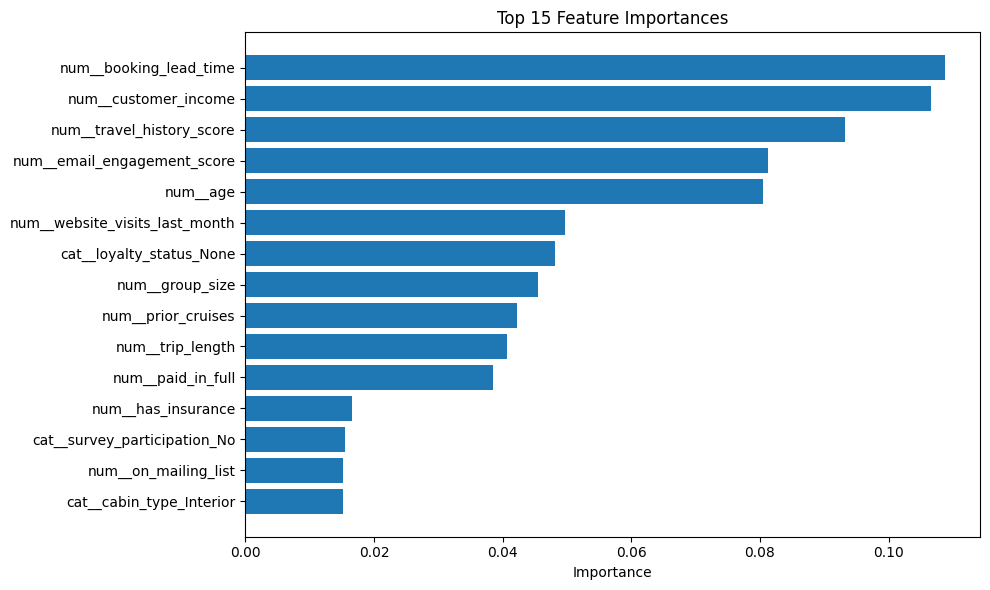

In [114]:
import matplotlib.pyplot as plt

# Ëé∑ÂèñÁâπÂæÅÂêçÔºàÂ§ÑÁêÜËøáÁöÑÔºâ
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# ÂèØËßÜÂåñÂâç 15 ‰∏™ÈáçË¶ÅÁâπÂæÅ
indices = importances.argsort()[::-1][:15]
plt.figure(figsize=(10,6))
plt.title("Top 15 Feature Importances")
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices][::-1])
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


üå≥ ÊúÄ‰Ω≥Ê†ëÊòØÁ¨¨ 78 Ê£µÔºåÂáÜÁ°ÆÁéáÔºö0.7000


/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26869 (\N{CJK UNIFIED IDEOGRAPH-68F5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26641 (\N{CJK UNIFIED IDEOGRAPH-6811}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/p

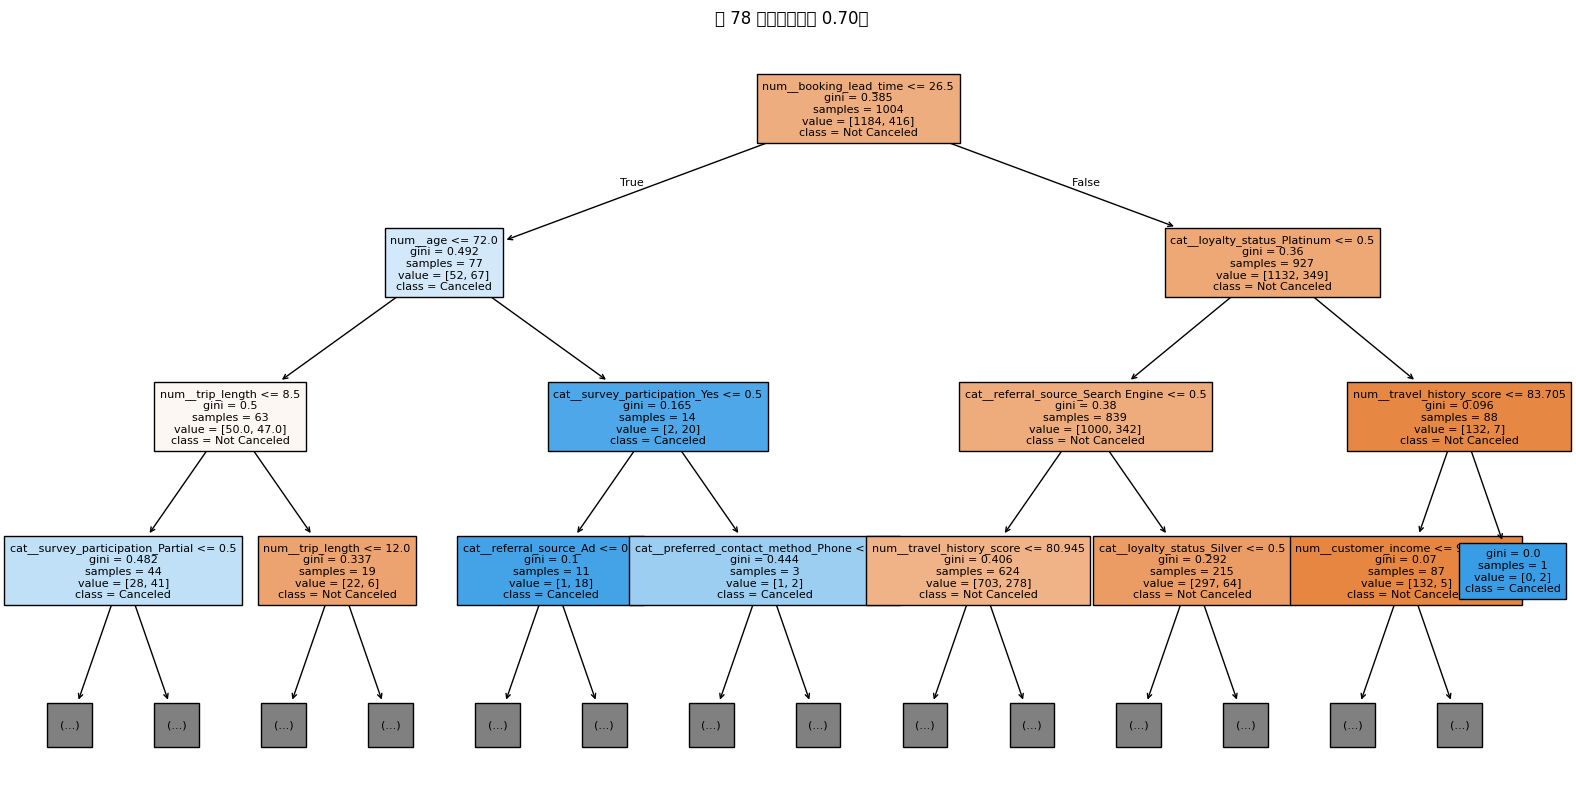

In [116]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ëé∑ÂèñÈ¢ÑÂ§ÑÁêÜÂêéÁöÑËÆ≠ÁªÉÈõÜ & ÊµãËØïÈõÜ
X_test_transformed = preprocessor.transform(X_test)

# Ëé∑ÂèñÊâÄÊúâÊ†ë
trees = rf_pipeline.named_steps['classifier'].estimators_

# ÊâæÂá∫Âú®ÊµãËØïÈõÜ‰∏äË°®Áé∞ÊúÄÂ•ΩÁöÑÈÇ£Ê£µÊ†ë
best_tree = None
best_accuracy = 0
best_index = -1

for i, tree in enumerate(trees):
    y_pred_tree = tree.predict(X_test_transformed)
    acc = accuracy_score(y_test, y_pred_tree)
    if acc > best_accuracy:
        best_accuracy = acc
        best_tree = tree
        best_index = i

print(f"üå≥ ÊúÄ‰Ω≥Ê†ëÊòØÁ¨¨ {best_index} Ê£µÔºåÂáÜÁ°ÆÁéáÔºö{best_accuracy:.4f}")

# ÂèØËßÜÂåñËøôÊ£µÊ†ëÔºàÂâç 3 Â±ÇÔºâ
feature_names = preprocessor.get_feature_names_out()
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=feature_names,
          class_names=['Not Canceled', 'Canceled'],
          filled=True,
          max_depth=3,
          fontsize=8)
plt.title(f"Á¨¨ {best_index} Ê£µÊ†ëÔºàÂáÜÁ°ÆÁéá {best_accuracy:.2f}Ôºâ")
plt.show()


## Comparison of models

/home/ethanchen/AD654-Sp25A3-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


üìå Logistic Regression
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       284
           1       0.55      0.21      0.30       116

    accuracy                           0.72       400
   macro avg       0.64      0.57      0.56       400
weighted avg       0.68      0.72      0.67       400

AUC: 0.7702768334142788

üìå Random Forest
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       284
           1       0.57      0.14      0.22       116

    accuracy                           0.72       400
   macro avg       0.65      0.55      0.53       400
weighted avg       0.68      0.72      0.65       400

AUC: 0.717323336571151


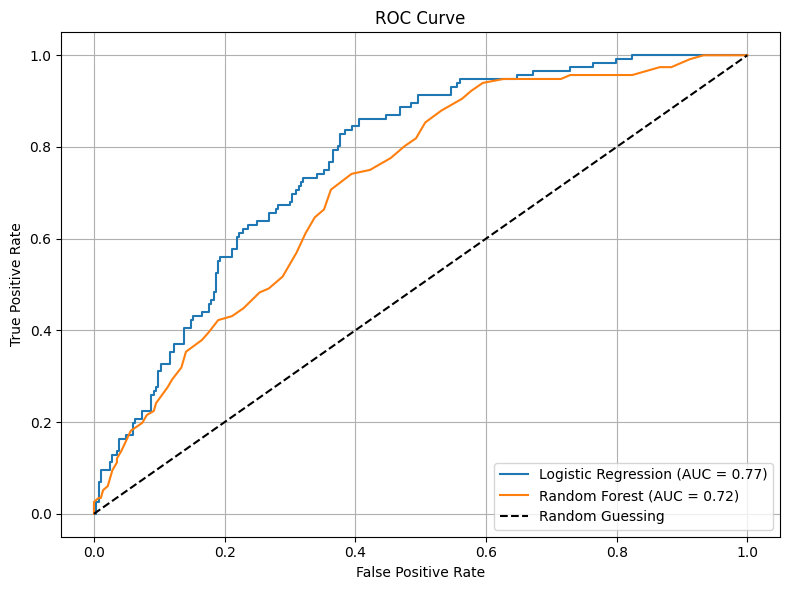

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ÂÆö‰πâ‰∏§‰∏™Ê®°Âûã
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=654)

# ÂàõÂª∫‰∏§‰∏™ pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr_model)
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# ÊãüÂêà‰∏§‰∏™Ê®°Âûã
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# È¢ÑÊµã
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# È¢ÑÊµãÊ¶ÇÁéáÔºàÁî®‰∫é ROC Âíå AUCÔºâ
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# ËæìÂá∫ÂáÜÁ°ÆÁéáÂíåÂàÜÁ±ªÊä•Âëä
print("üìå Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_proba_lr))

print("\nüìå Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))

# ÁªòÂà∂ ROC Êõ≤Á∫ø
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_rf)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Strategic Memo